In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris=load_iris()
df=pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df['targte']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targte
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = df.loc[:, features].values
y = df.loc[:, ['targte']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data=x, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(x)
principal_df=pd.DataFrame(data=principal_components,columns=['Principal_component 1','Principal component 2'])
final_df=pd.concat([principal_df,df['targte']], axis=1)

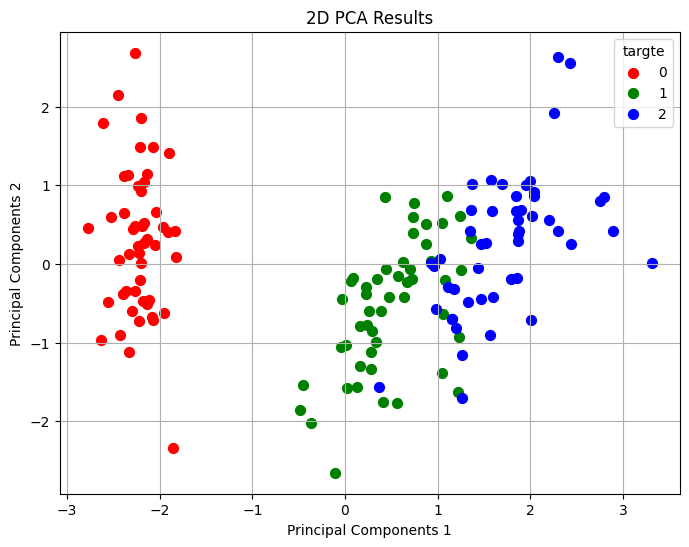

In [ ]:
plt.figure(figsize=(8,6))
targtes=[0,1,2]
colors=['r','g','b']
for targte, color in zip(targtes,colors):
  indices_to_keep=final_df['targte'] ==targte
  plt.scatter(final_df.loc[indices_to_keep,'Principal_component 1'],final_df.loc[indices_to_keep,'Principal component 2'], c=color, s=50)

plt.xlabel('Principal Components 1')
plt.ylabel('Principal Components 2')

plt.title('2D PCA Results')
plt.legend(targtes,title='targte')
plt.grid(True)
plt.show()

In [ ]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
finalDf = pd.concat([principalDf, df[['targte']]], axis=1)
finalDf.head()

,Principal Component 1,Principal Component 2,targte
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


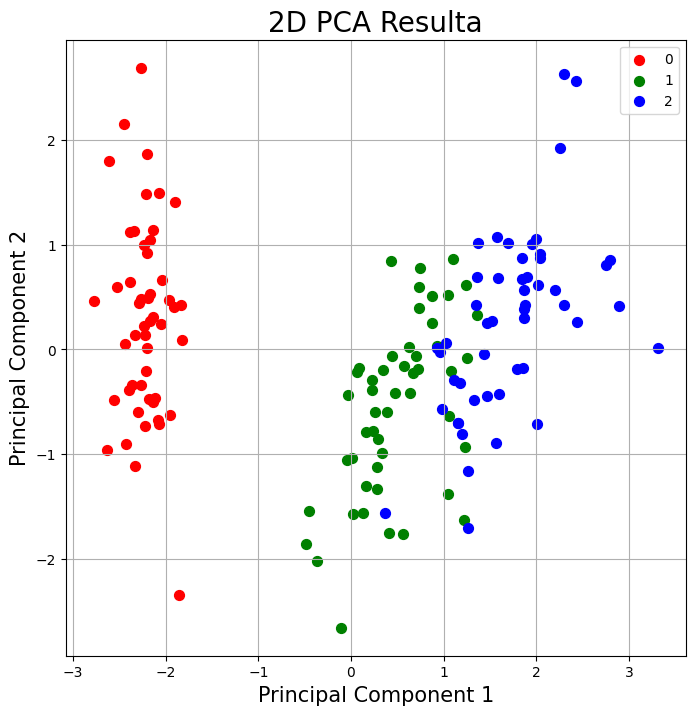

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2D PCA Resulta',fontsize=20)
targtes=[0,1,2]
colors=['r','g','b']
for targte, color in zip(targtes,colors):
  indicesToKeep=finalDf['targte'] ==targte
  ax.scatter(finalDf.loc[indicesToKeep,'Principal Component 1'],finalDf.loc[indicesToKeep,'Principal Component 2'], c=color ,s=50)
ax.legend(targtes)
ax.grid()
plt.show()

In [ ]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.72962445, 0.22850762])

In [ ]:
from sklearn.decomposition import KernelPCA
kernel_pca=KernelPCA(n_components=2,kernel='rbf')
kernel_principalComponenets=kernel_pca.fit_transform(x)
kernel_principalDf=pd.DataFrame(data=kernel_principalComponenets,columns=['Kernel Principal Component 1','Kernel Principal Component 2'])
kernel_finalDf = pd.concat([kernel_principalDf, df[['targte']]], axis=1)
kernel_finalDf.head()

,Kernel Principal Component 1,Kernel Principal Component 2,targte
0,0.802038,-0.093750,0
1,0.665623,0.109343,0
2,0.758616,0.012529,0
3,0.706189,0.056918,0
4,0.793607,-0.126192,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
data = load_iris()
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf')
kernelPrincipalComponents = kpca.fit_transform(x)
kernelPrincipalDf = pd.DataFrame(data=kernelPrincipalComponents, columns=['Kernel Principal Component 1', 'Kernel Principal Component 2'])
kernelFinalDf = pd.concat([kernelPrincipalDf, df[['target']]], axis=1)
kernelFinalDf.head()

,Kernel Principal Component 1,Kernel Principal Component 2,target
0,0.802038,-0.093750,0
1,0.665623,0.109343,0
2,0.758616,0.012529,0
3,0.706189,0.056918,0
4,0.793607,-0.126192,0


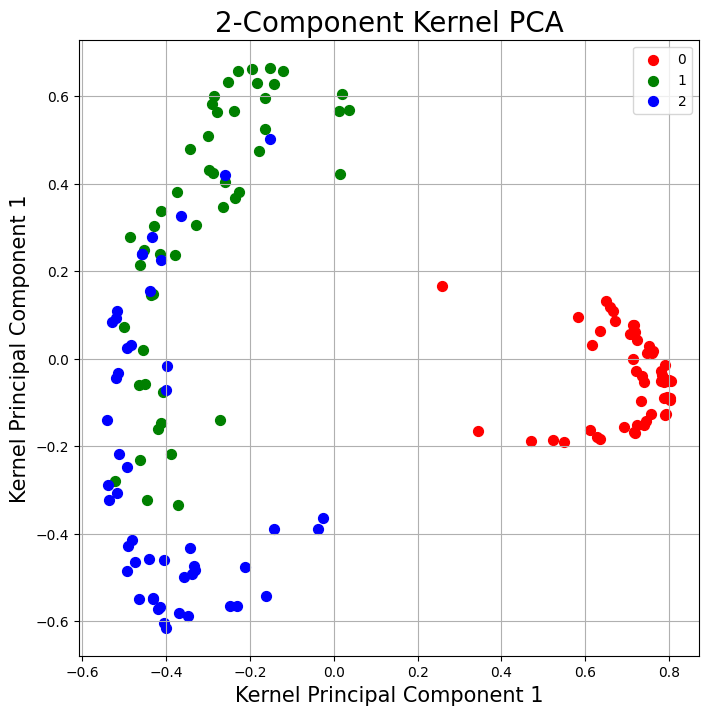

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Kernel Principal Component 1',fontsize=15)
ax.set_ylabel('Kernel Principal Component 1',fontsize=15)
ax.set_title('2-Component Kernel PCA',fontsize=20)
targets=[0,1,2,]
colors=['r','g','b']
for targte,color in zip(targets,colors):
  indicesToKeep=kernelFinalDf['target'] ==targte
  ax.scatter(kernelFinalDf.loc[indicesToKeep, 'Kernel Principal Component 1'], kernelFinalDf.loc[indicesToKeep, 'Kernel Principal Component 2'], c=color, s=50)
ax.legend(targtes)
ax.grid()
plt.show()